# Perceptron
### Datos linealmente separables

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data of 10 people [age, savings]

people = np.array([[0.3, 0.4], [0.3, 0.3],
                   [0.3, 0.2], [0.3, 0.1],
                   [0.5, 0.2], [0.3, 0.8],
                   [0.6, 0.8], [0.5, 0.6],
                   [0.7, 0.6], [0.8, 0.5]])

# 1 = approved   0= denied

classes = np.array([0,0,0,0,0,1,1,1,1,1])

In [5]:
print(people)
print(classes)

[[0.3 0.4]
 [0.3 0.3]
 [0.3 0.2]
 [0.3 0.1]
 [0.5 0.2]
 [0.3 0.8]
 [0.6 0.8]
 [0.5 0.6]
 [0.7 0.6]
 [0.8 0.5]]
[0 0 0 0 0 1 1 1 1 1]


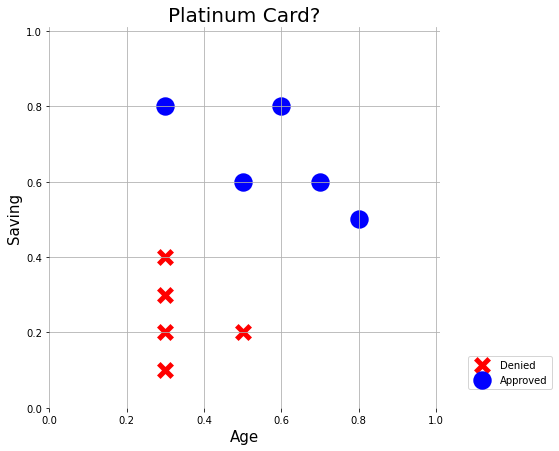

In [6]:
# Dispersion diagram (age, saving)
plt.figure(figsize=(7,7))
plt.scatter(people[classes == 0].T[0],
            people[classes == 0].T[1],
            marker='x', s=180, color='red', linewidths=5, label="Denied")
plt.scatter(people[classes == 1].T[0],
            people[classes == 1].T[1],
            marker='o', s=180, color='blue', linewidths=5, label="Approved")
plt.title('Platinum Card?', fontsize=20)
plt.xlabel('Age',    fontsize=15)
plt.ylabel('Saving', fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.grid()
plt.show()

### Activation function (Step function)

In [7]:
# w1*x1 + w2*x2 + ... wn*xn

# threshold = bias = umbral


def activation(weights, x, bias):
    # x1*w1 + x2*w2 > threshold 
    # x1*w1 + x2*w2 - threshold > 0
    z = weights * x
    if z.sum() + b > 0:
        return 1
    else:
        return 0

weights = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)

print('w: ',weights)
print('bias: ',b)
print('output: ', activation(weights, [0.5, 0.5], b))

w:  [-0.09994315 -0.844311  ]
bias:  -0.7463470426872172
output:  0


### Pseudocode of Perceptron

0. Init weight and bias
1. Max_epochs = 100
2. epochs = 0
3. rate_of_learn = 0.01
4. While (epoch < Max_epochs) do:
5.   for each step of training do:
6.        to_calculate the output of perceptron,
7.        to_calculate the error.
8.        to_update the weights and bias using the rate_of_learn and error
9.        epoch += 1

Note: 'epochs' is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset

### Training the Perceptron

In [23]:
weights = np.random.uniform(-1,1, size=2)
b = np.random.uniform(-1,1)
rate_of_learn = 0.01
epochs = 100
error_acumula = []
for epoch in range(epochs):
    error_total = 0
    for i in range(len(people)):
        prediction = activation(weights, people[i], b)
        error = classes[i] - prediction    # classes = [0,1] and prediction can be [0,1] then error can be [0,1].
        error_total += error**2
        weights[0] += rate_of_learn + people[i][0] * error
        weights[1] += rate_of_learn + people[i][1] * error
        b += rate_of_learn * error
        error_acumula.append(error_total)
    print(error_total, end=' ')

print('\n', activation(weights, [0.1, 0.1], b))
print('\n', activation(weights, [0.5, 0.8], b))


4 3 3 3 4 3 3 4 3 4 3 3 4 3 4 3 2 2 3 3 3 4 3 2 2 3 3 3 2 2 3 2 2 1 2 3 2 2 1 2 3 2 2 1 2 3 2 2 1 2 3 2 2 1 2 1 2 1 2 2 0 2 1 2 1 1 0 0 2 1 1 0 0 2 1 2 1 1 0 0 2 1 1 0 0 0 1 0 0 2 1 1 0 0 2 1 1 0 0 0 
 0

 1


### Zones: 1 = approved   0= denied
#### Graphs of dispersion [age, savings]

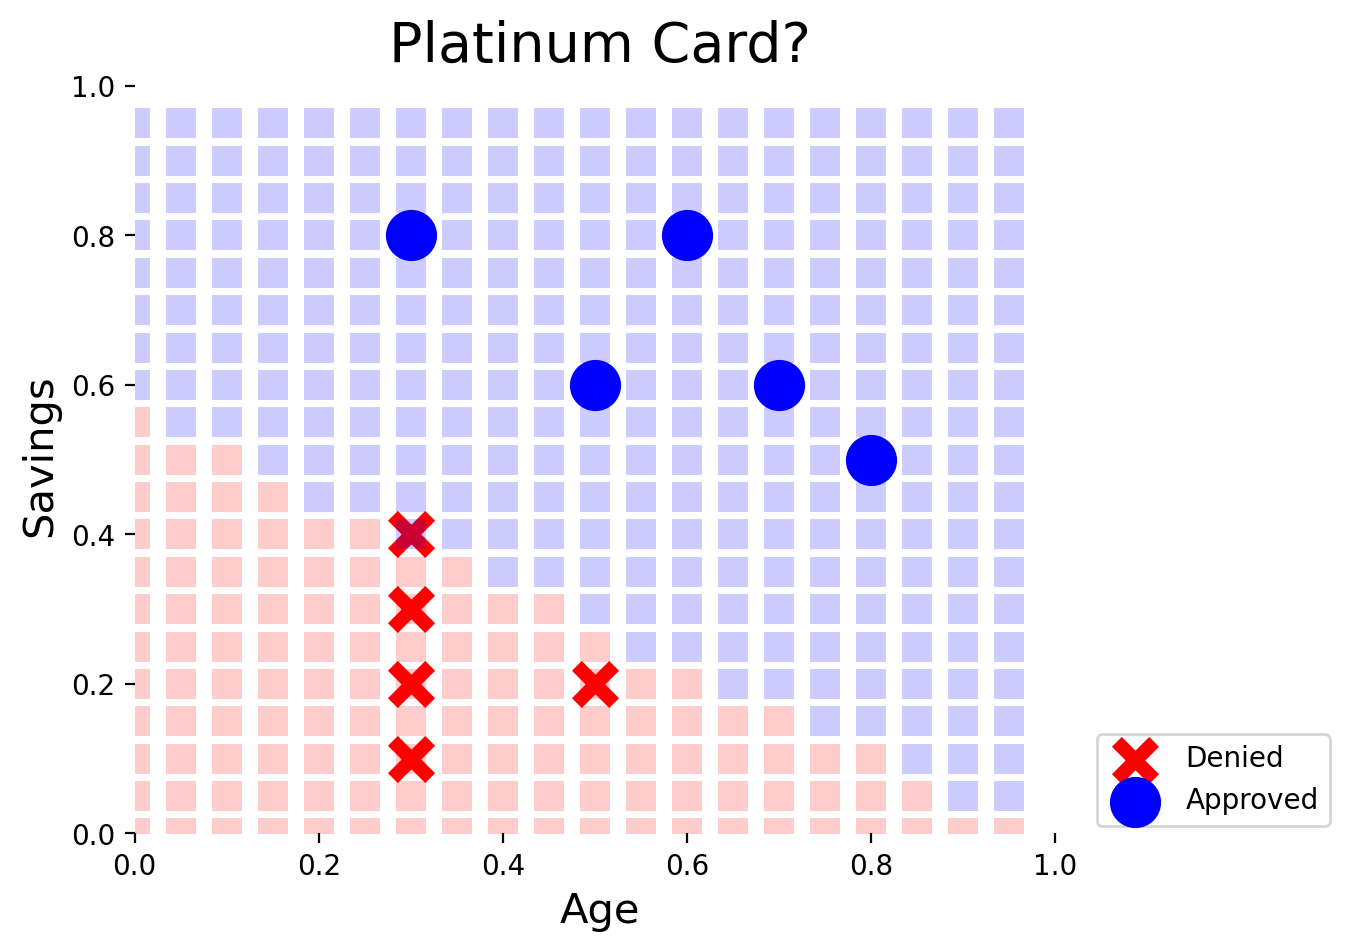

In [9]:
plt.figure(figsize=(6,5), dpi=200)
plt.title('Platinum Card?', fontsize=20)

plt.scatter(people[classes == 0].T[0],
            people[classes == 0].T[1],
            marker='x', s=180, color='red', linewidths=5, label='Denied')

plt.scatter(people[classes == 1].T[0],
            people[classes == 1].T[1],
            marker='o', s=180, color='blue', linewidths=5, label='Approved')

for age in np.arange(0,1,0.05):
    for saving in np.arange(0,1,0.05):
        color = activation(weights, [age,saving], b)
        if color == 1:
            plt.scatter(age, saving, marker='s', s=110, color='blue', alpha=0.2, linewidths=0)
        else:
            plt.scatter(age, saving, marker='s', s=110, color='red', alpha=0.2, linewidths=0)

plt.xlabel('Age', fontsize=15)
plt.ylabel('Savings', fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()




# Perceptron from Scikit-learn

In [10]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron().fit(people, classes)
perceptron.predict([ [0.1, 0.1], [0.5, 0.8] ])


array([0, 1])

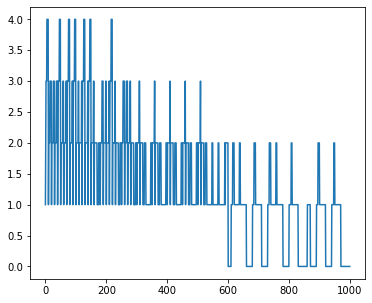

In [25]:
error_acumula
x = np.arange(0,len(error_acumula))
plt.figure(figsize=(6,5))
plt.plot(x,error_acumula)
plt.show()

